In [3]:
# to make import as we would be in root directory
import sys
sys.path.append('..')

In [4]:
import random
from collections import Counter
import numpy as np
import cv2
from lib.data import load_book, load_emnist, load_kmnist, MAPPINGS
import matplotlib.pyplot as plt

In [5]:
book = load_book().replace(' ', '').replace('\n', '')
emnist = load_emnist()
kmnist = load_kmnist()

## Counts of raw letters

In [6]:
counter = Counter(book)
total = len(book)
print('No | char |  count | percent')
for i, (char, count) in enumerate(counter.most_common()):
    percent = count / total * 100
    print(f'{i:2} |  {char}   | {count:6} | {percent:5.2f}%')

No | char |  count | percent
 0 |  e   |  11462 | 10.65%
 1 |  t   |   9492 |  8.82%
 2 |  o   |   9206 |  8.55%
 3 |  a   |   8048 |  7.48%
 4 |  i   |   7101 |  6.60%
 5 |  n   |   6888 |  6.40%
 6 |  h   |   6678 |  6.21%
 7 |  s   |   5818 |  5.41%
 8 |  r   |   5012 |  4.66%
 9 |  d   |   4796 |  4.46%
10 |  l   |   4225 |  3.93%
11 |  u   |   2979 |  2.77%
12 |  w   |   2440 |  2.27%
13 |  g   |   2422 |  2.25%
14 |  y   |   2265 |  2.10%
15 |  m   |   2018 |  1.88%
16 |  f   |   1858 |  1.73%
17 |  c   |   1828 |  1.70%
18 |  b   |   1739 |  1.62%
19 |  p   |   1605 |  1.49%
20 |  k   |    999 |  0.93%
21 |  I   |    930 |  0.86%
22 |  P   |    920 |  0.85%
23 |  v   |    641 |  0.60%
24 |  R   |    538 |  0.50%
25 |  T   |    520 |  0.48%
26 |  A   |    512 |  0.48%
27 |  E   |    457 |  0.42%
28 |  O   |    405 |  0.38%
29 |  H   |    398 |  0.37%
30 |  W   |    385 |  0.36%
31 |  S   |    345 |  0.32%
32 |  C   |    337 |  0.31%
33 |  B   |    300 |  0.28%
34 |  N   |    287 

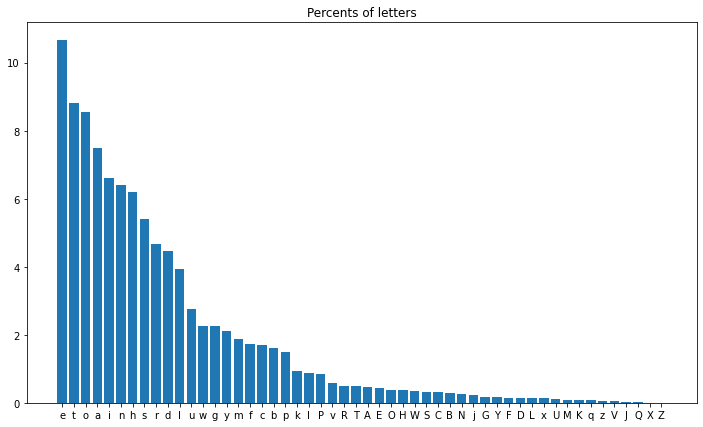

In [9]:
letters, counts = ([x[0] for x in counter.most_common()], [x[1] for x in counter.most_common()])
percents = np.array(counts) / sum(counts) * 100
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.bar(letters, percents)
ax.set_title('Percents of letters');

## Sizes of chars clusters

In [10]:
mapped_chars = map(lambda c: MAPPINGS[c], book)
counter = Counter(mapped_chars)
total = len(book)
print('No | label |  count | percent')
for i, (label, count) in enumerate(counter.most_common()):
    percent = count / total * 100
    print(f'{i:2} |    {label} | {count:6} | {percent:5.2f}%')

No | label |  count | percent
 0 |    39 |  11462 | 10.65%
 1 |    24 |   9611 |  8.93%
 2 |    46 |   9492 |  8.82%
 3 |    36 |   8048 |  7.48%
 4 |    18 |   8031 |  7.46%
 5 |    43 |   6888 |  6.40%
 6 |    42 |   6678 |  6.21%
 7 |    28 |   6163 |  5.73%
 8 |    45 |   5012 |  4.66%
 9 |    38 |   4796 |  4.46%
10 |    21 |   4375 |  4.07%
11 |    30 |   3089 |  2.87%
12 |    32 |   2825 |  2.63%
13 |    25 |   2525 |  2.35%
14 |    34 |   2443 |  2.27%
15 |    41 |   2422 |  2.25%
16 |    12 |   2165 |  2.01%
17 |    22 |   2122 |  1.97%
18 |    40 |   1858 |  1.73%
19 |    37 |   1739 |  1.62%
20 |    20 |   1096 |  1.02%
21 |    31 |    696 |  0.65%
22 |    27 |    538 |  0.50%
23 |    29 |    520 |  0.48%
24 |    10 |    512 |  0.48%
25 |    14 |    457 |  0.42%
26 |    17 |    398 |  0.37%
27 |    11 |    300 |  0.28%
28 |    23 |    287 |  0.27%
29 |    19 |    256 |  0.24%
30 |    16 |    193 |  0.18%
31 |    15 |    162 |  0.15%
32 |    13 |    153 |  0.14%
33 |    33 | 

2023-01-10 19:30:33.753 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-01-10 19:30:33.753 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


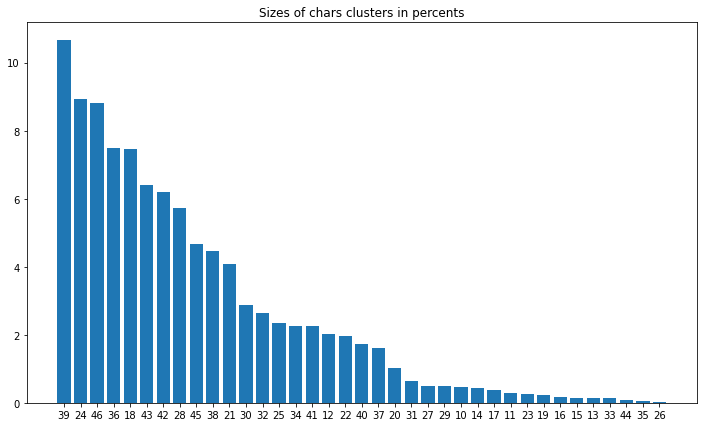

In [12]:
labels, counts = ([x[0] for x in counter.most_common()], [x[1] for x in counter.most_common()])
percents = np.array(counts) / sum(counts) * 100
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.bar([str(label) for label in labels], percents)
ax.set_title('Sizes of chars clusters in percents');

## Perfect mapping

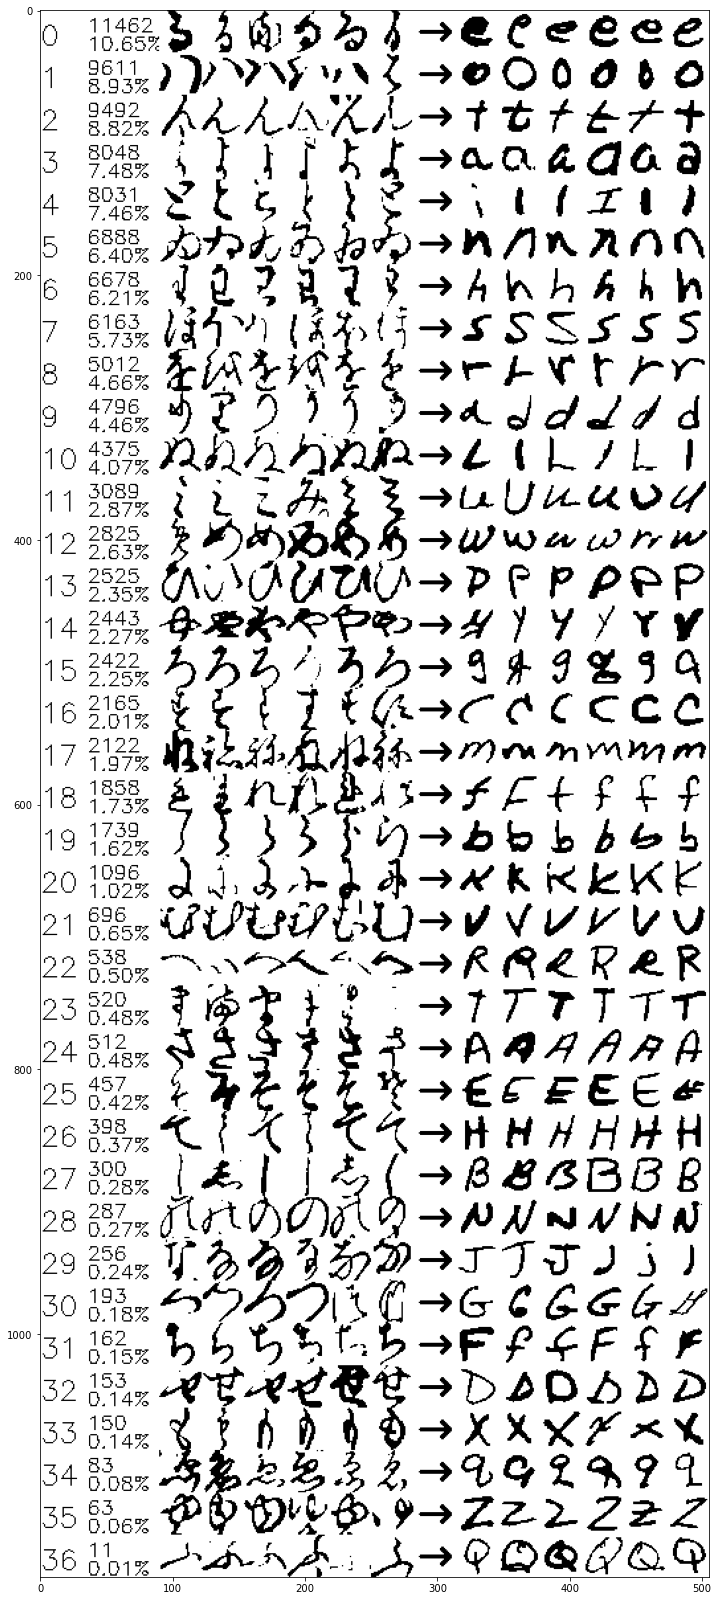

In [8]:
emnist_chars, emnist_labels = emnist
kmnist_chars, kmnist_labels = kmnist

arrow = np.zeros((32, 32))
cv2.line(arrow, (5, 16), (27, 16), (255, 255, 255), 2)
cv2.line(arrow, (27, 16), (27-6, 16-6), (255, 255, 255), 2)
cv2.line(arrow, (27, 16), (27-6, 16+6), (255, 255, 255), 2)

rows = []
for i, (label, count) in enumerate(counter.most_common()):
    percent = count / total * 100
    text = np.zeros((32, 90))
    cv2.putText(text, f'{i}', org=(0, 26), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 255, 255))
    cv2.putText(text, f'{count}', org=(35, 16), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 255, 255))
    cv2.putText(text, f'{percent:.2f}%', org=(35, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 255, 255))
        
    emnist_rand = list(random.choices(emnist_chars[emnist_labels == label], k=6))
    kmnist_rand = list(random.choices(kmnist_chars[kmnist_labels == label], k=6))
    chars_row = np.hstack([text/255, *kmnist_rand, arrow/255, *emnist_rand])
    rows.append(chars_row)
    
image = np.vstack(rows)
fig, ax = plt.subplots(1, 1, figsize=(12, len(rows)*2))
ax.imshow(1-image, 'gray');